In [1]:
import scipy.stats
import numpy as np
import scipy as sp
import pandas as pd
import  matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import sklearn as sk
import statsmodels.api as sm
plt.rc("font", family="Malgun Gothic")
mpl.rcParams['axes.unicode_minus'] = False

In [2]:
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()
dfX = pd.DataFrame(boston.data, columns=boston.feature_names)
dfy = pd.DataFrame(boston.target, columns=['MEDV'])
df = pd.concat([dfX, dfy], axis=1)

C:\Users\ghdak\anaconda3\envs\gpu_env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California hous

In [3]:
df.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


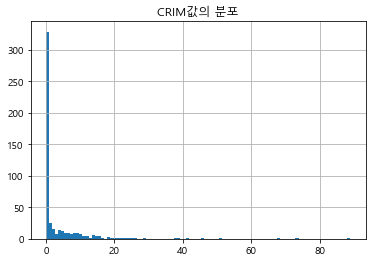

In [4]:
df['CRIM'].hist(bins=100)
plt.title('CRIM값의 분포')
plt.show()

In [5]:
for i, sym in enumerate(symbols):
    ax = plt.subplot(2, 2, i+1)
    sp.stats.probplot(log_returns[sym].dropna(), plot=ax)
plt.tight_layout()
plt.show()

NameError: name 'symbols' is not defined

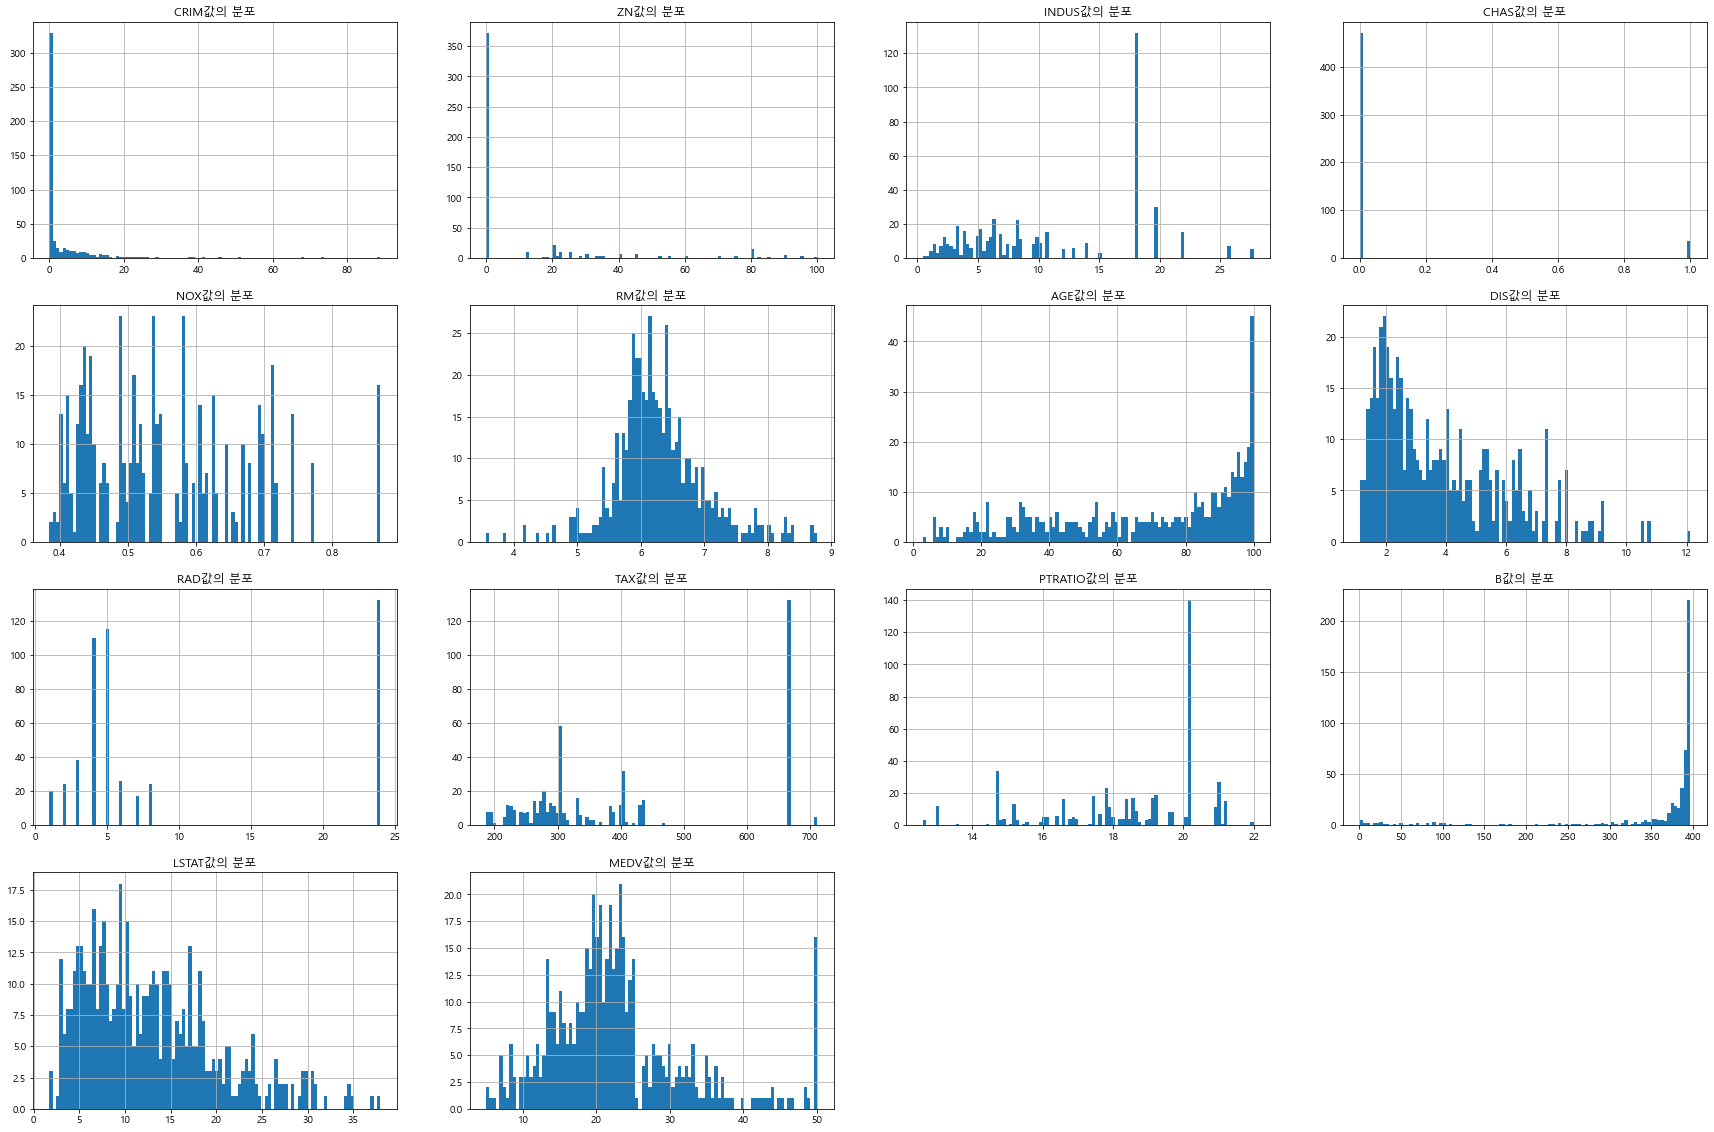

In [ ]:
plt.figure(figsize=(30,20))

for idx, col in enumerate(df.columns):
    ax = plt.subplot(4,4, idx+1)
    df[col].hist(bins=100, ax=ax)
    plt.title(f"{col}값의 분포")

plt.show()

C:\Users\ghdak\anaconda3\envs\gpu_env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


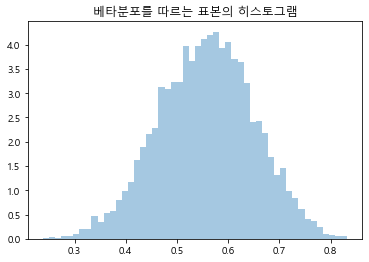

In [ ]:
np.random.seed(0)
x = sp.stats.beta(15, 12).rvs(10000)

sns.distplot(x, kde=False, norm_hist=True)
plt.title('베타분포를 따르는 표본의 히스토그램')
plt.show()

In [ ]:
# 모멘트 방법으로 모수 구해보기(15,12)
def esimate_beta(x):
    x_bar = x.mean()
    s2 = x.var()
    a = x_bar * ((x_bar*(1-x_bar))/s2 - 1)
    b = (1-x_bar)*((x_bar*(1-x_bar))/s2 - 1)
    return a, b

params = esimate_beta(x)
params

(15.346682046700685, 12.2121537049535)

C:\Users\ghdak\anaconda3\envs\gpu_env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


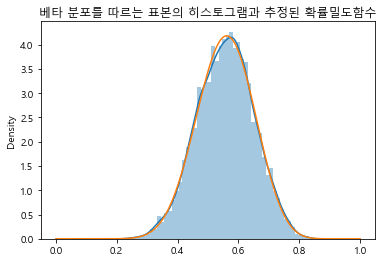

In [ ]:
xx = np.linspace(0,1,1000)
sns.distplot(x, kde=True, norm_hist=True)
plt.plot(xx, sp.stats.beta(params[0], params[1]).pdf(xx))
plt.title('베타 분포를 따르는 표본의 히스토그램과 추정된 확률밀도함수')
plt.show()

C:\Users\ghdak\anaconda3\envs\gpu_env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


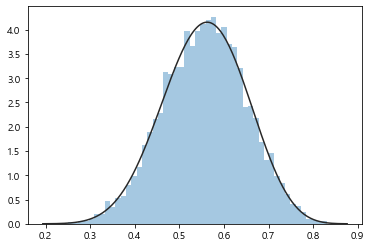

In [ ]:
# distplot에 모수추정 기능이 탑재돼 있음.

sns.distplot(x, kde=False, fit=sp.stats.beta)
plt.show()

C:\Users\ghdak\anaconda3\envs\gpu_env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ghdak\anaconda3\envs\gpu_env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


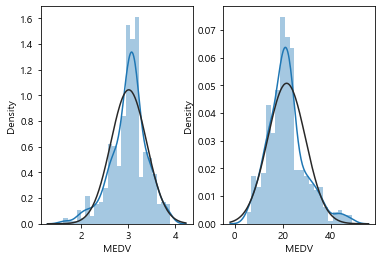

In [ ]:
plt.subplot(121)
sns.distplot(np.log(df[df['MEDV'] != 50]['MEDV']), kde=True, fit=sp.stats.norm)
plt.subplot(122)
sns.distplot(df[df['MEDV'] != 50]['MEDV'], kde=True, fit=sp.stats.norm)
plt.show()

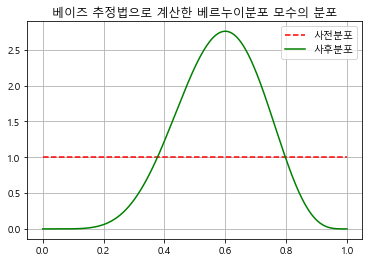

In [7]:
xx = np.linspace(0, 1, 1000)
a0, b0 = 1, 1
plt.plot(xx, sp.stats.beta(a0, b0).pdf(xx), c='r', ls='--', label='사전분포')
a1, b1= 6+1, 4+1
plt.plot(xx, sp.stats.beta(a1, b1).pdf(xx), c='g', ls='-', label='사후분포')
plt.legend()
plt.grid(True)
plt.title('베이즈 추정법으로 계산한 베르누이분포 모수의 분포')
plt.show()

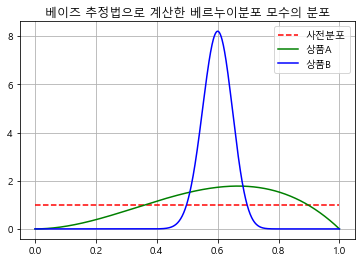

In [11]:
# 상품A, B 비교
xx = np.linspace(0, 1, 1000)
a0, b0 = 1, 1
plt.plot(xx, sp.stats.beta(a0, b0).pdf(xx), c='r', ls='--', label='사전분포')
a1, b1= 2+1, 1+1
plt.plot(xx, sp.stats.beta(a1, b1).pdf(xx), c='g', ls='-', label='상품A')
a2, b2= 60+1, 40+1
plt.plot(xx, sp.stats.beta(a2, b2).pdf(xx), c='b', ls='-', label='상품B')
plt.legend()
plt.grid(True)
plt.title('베이즈 추정법으로 계산한 베르누이분포 모수의 분포')
plt.show()

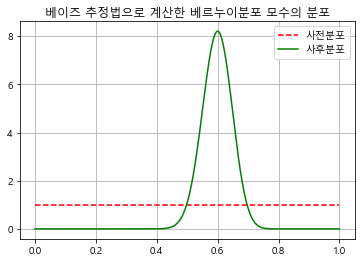

In [9]:
# 상품B
